## Data Science Assignment

## Dataset Chosen - Adult Income 

##### This dataset, sourced from the 1994 Census Bureau database by Ronny Kohavi and Barry Becker in the context of Data Mining and Visualization at Silicon Graphics, consists of a set of records that were carefully filtered. The selection criteria included conditions such as age greater than 16, annual gross income over 100, final weight greater than 1, and positive hours worked per week. The primary goal of this dataset is to predict whether an individual earns more than 50,000 annually.

## FEATURES:

* AGE -continuous.
* workclass -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt -continuous.
* education - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num - continuous.
* marital-status -Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation -Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship -Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race -White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex -Female, Male.
* capital-gain -continuous.
* capital-loss -continuous.
* hours-per-week -continuous.
* native-country -United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class - >50K, <=50K




## Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import math
%matplotlib inline
warnings.filterwarnings("ignore")
# Set now of columns visible to 100
pd.set_option('display.max_columns',100)          
pd.set_option('display.max_rows',100) 

In [9]:
# Reading Data:
df=pd.read_csv("2_2nd dataset_adult income.csv")
df.head()  #Loading the First Five Rows:

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Lets examine the contents of the dataframe 

In [10]:
df.shape

(32561, 15)

In [11]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set Contain 32561 Rows and 15 Columns


In [12]:
#Check Data Types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
pd.value_counts(df.dtypes)

object    9
int64     6
dtype: int64

### Dataset contains 9 category variables and 6 numerical variables

In [15]:
# Let's replace ? values with NULL
df[df == '?'] = np.nan

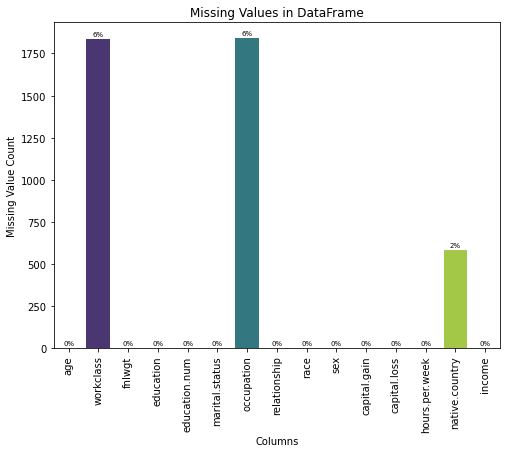

In [17]:
## Checking missing values and visualizing it

missing_counts = df.isnull().sum()
present_values=df.notnull().sum()
unique_value_counts = df.nunique()
total_count = len(df)
missing_percentage= (missing_counts / total_count) * 100
present_percentage= (present_values / total_count) * 100
unique_percentage= (unique_value_counts / total_count) * 100

# Plotting the missing values % in the dataset
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')

# Add labels and title
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.xticks(rotation=90)

for p, label in zip(ax.patches, missing_percentage):
    ax.annotate(f'{label:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [19]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Wokclass,occupation and native_country have missing values. Since they are categorical variales, let's handle them by using mode. 

In [20]:
# Imputing missing values with mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
# Checking after imputation
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [23]:
# Checking for Duplicates in the dataset
df.duplicated().sum()

24

In [24]:
# Dropping Duplicates
df.drop_duplicates(keep="first",inplace=True)

In [30]:
# Sample of the unique elements of the features
Unique_values_list=[]
for column in df.columns:
    unique_values = df[column].unique().tolist()
    num_unique=df[column].nunique()
    if num_unique==1:
      Unique_values_list.append(column)
    print("{} Unique values in '{}': {} ".format(num_unique,column,unique_values[:5]))
print(Unique_values_list)

73 Unique values in 'age': [90, 82, 66, 54, 41] 
8 Unique values in 'workclass': ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc'] 
21648 Unique values in 'fnlwgt': [77053, 132870, 186061, 140359, 264663] 
16 Unique values in 'education': ['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate'] 
16 Unique values in 'education.num': [9, 10, 4, 6, 16] 
7 Unique values in 'marital.status': ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse'] 
14 Unique values in 'occupation': ['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct', 'Other-service', 'Adm-clerical'] 
6 Unique values in 'relationship': ['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband'] 
5 Unique values in 'race': ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'] 
2 Unique values in 'sex': ['Female', 'Male'] 
119 Unique values in 'capital.gain': [0, 99999, 41310, 34095, 27828] 
92 Unique values in 'capital.loss': [4356, 3900, 377

## Univariate analysis

## Let's check the distribution of all the numerical values

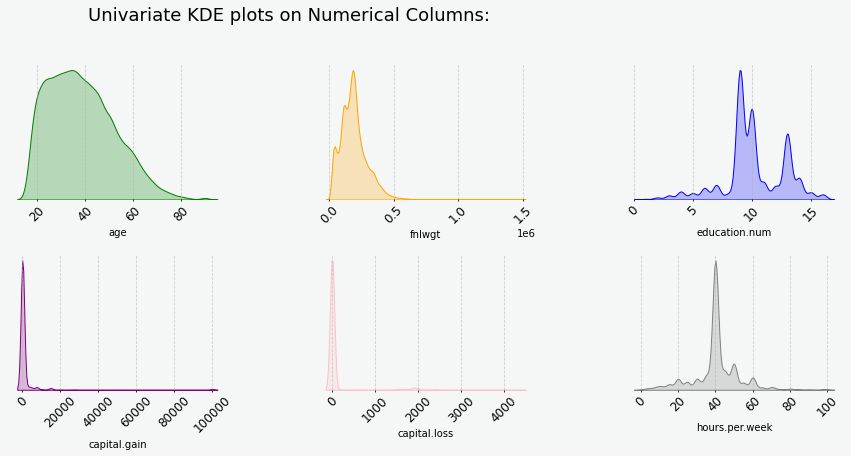

In [38]:
# Create a figure with a specified size and set its background color with gridlines
fig = plt.figure(figsize=(15, 6))
fig.patch.set_facecolor('#f5f6f6')


# Create a 2x3 grid layout for subplots with specified spacing
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.4, hspace=0.4)

# Add subplots to the grid
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

# Store the subplots in a list for easy access
axes = [ax0, ax1, ax2, ax3, ax4, ax5]

# Customize the appearance of each subplot
for ax in axes:
    ax.set_facecolor('#f5f6f6')  # Set background color
    ax.grid(True, linestyle='--', alpha=0.6)  # Add gridlines to subplot
    ax.tick_params(axis='x', labelsize=12, which='major', direction='out', pad=2, length=1.5,rotation=45)  # Customize x-axis ticks
    ax.tick_params(axis='y', colors='black')  # Set y-axis tick color
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)  # Hide spines on all sides of the subplot

# Select numerical columns from the DataFrame
cols = df.select_dtypes(exclude='object').columns

# Modified colors for the KDE plots
kde_colors = ["green", "orange", "blue", "purple", "pink", "gray"]

# Plot KDE plots for each numerical column
for i, col in enumerate(cols):
    sns.kdeplot(x=df[col], color=kde_colors[i], fill=True, ax=axes[i])

# Add a title to the figure
fig.text(0.2, 0.98, "Univariate KDE plots on Numerical Columns:", **{'font': 'Roboto Mono', 'size': 18},
         alpha=1)

# Display the figure
plt.show()

* 40 Hours per week seem to be the average work timings.
* Age has left skewed distribution.

## Let's look at the distribution of categorical variables 

#### Income - Almost 75% of the dataset consists of <50k. If this is considered as the target variable, there will be a class imbalance. 

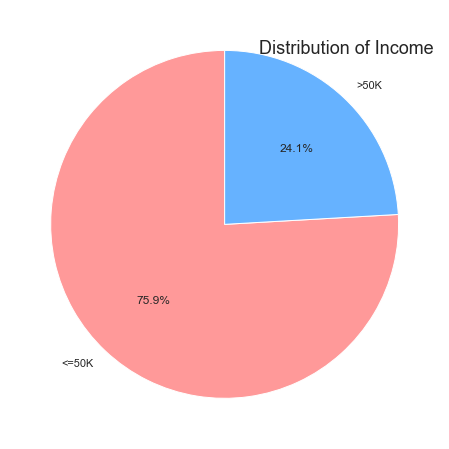

In [48]:
# Set custom colors
custom_colors = ['#FF9999', '#66B2FF']

# Count the occurrences of each category
income_counts = df['income'].value_counts()

# Create a pie chart using Seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=90)
# Add a title to the figure
plt.text(0.2, 0.98, "Distribution of Income", **{'font': 'Arial', 'size': 18},
         alpha=1)


# Show the pie chart
plt.show()

#### Gender - 66% of the data is filled with only Males.

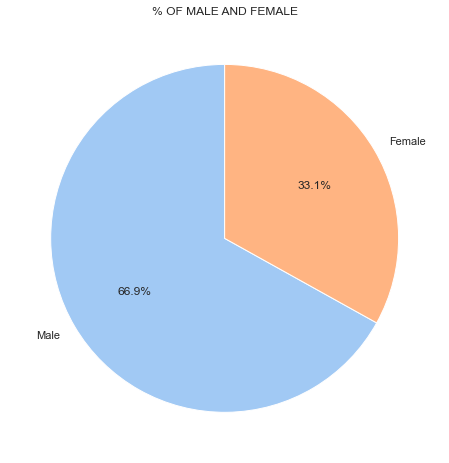

In [50]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Count the occurrences of each gender
sex_counts = df['sex'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title('% OF MALE AND FEMALE')

# Show the pie chart
plt.show()

#### 85% of the data consists of white population.

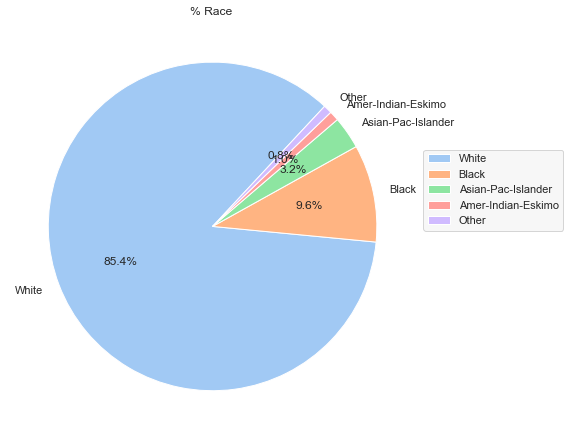

In [68]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Count the occurrences of each gender
sex_counts = df['race'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index,autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=47)
plt.title('% Race ')

# Move legend outside the pie chart and adjust layout
plt.legend(bbox_to_anchor=(1, 0.7), loc="upper left")

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()

## Let's see the distribution of all the categorical variables in one go using bar graphs.

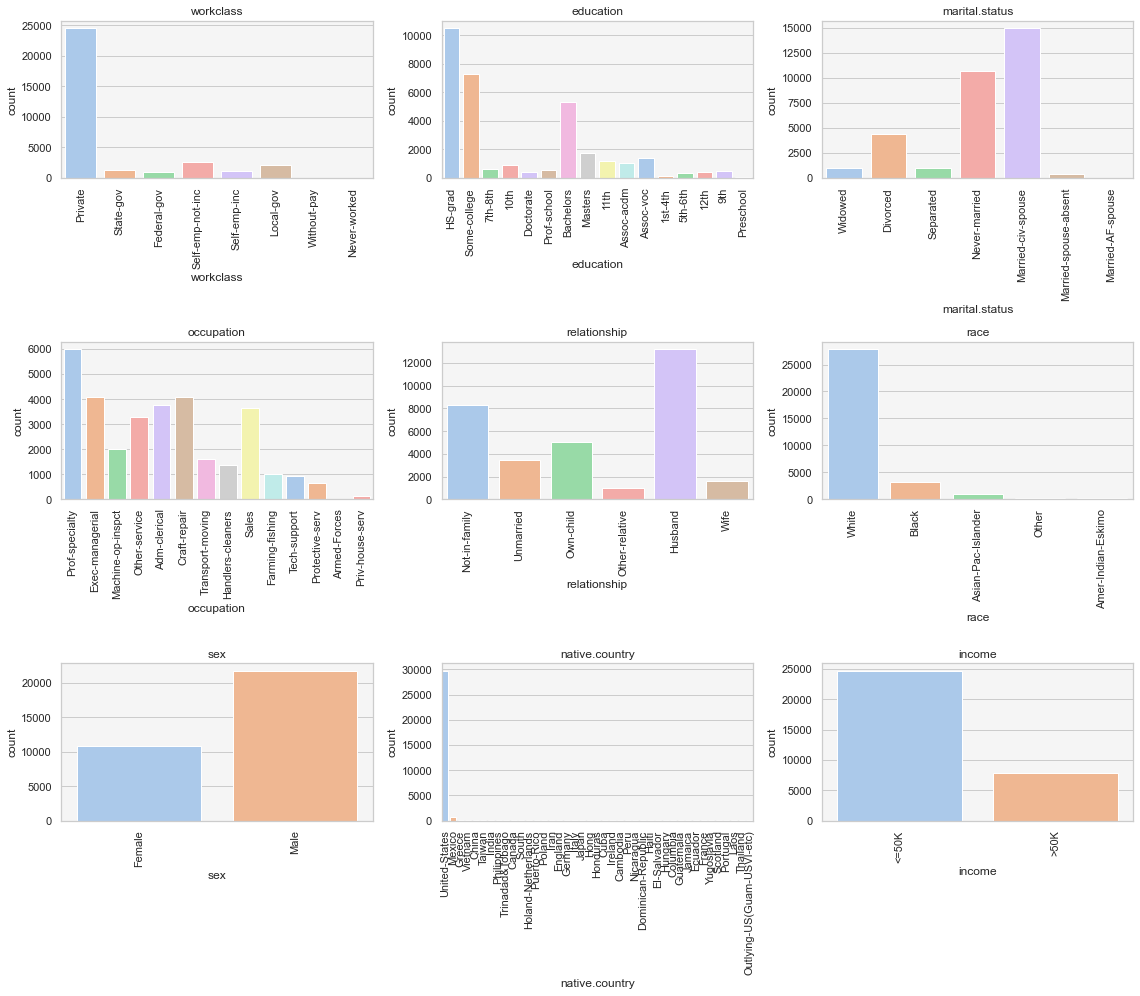

In [61]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

fields = df.select_dtypes(exclude="number").columns

figure_size = (16, 14)
cols = 3
rows = math.ceil(len(fields) / cols)

plt.subplots(rows, cols, figsize=figure_size)

for i, field in enumerate(fields, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=field, data=df, palette="pastel")
    plt.title(field)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [105]:
fields = df.select_dtypes(exclude="number").columns

In [106]:
fields


Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

## Let's check the skew and kurtosis of the numerical variables

In [70]:
df.skew()

age                0.557663
fnlwgt             1.447703
education.num     -0.309500
capital.gain      11.949403
capital.loss       4.592702
hours.per.week     0.228759
dtype: float64

In [71]:
df.kurt()

age                -0.169850
fnlwgt              6.222006
education.num       0.619024
capital.gain      154.682954
capital.loss       20.358254
hours.per.week      2.917718
dtype: float64

## Let's check the variable correlation for bivariate analysis

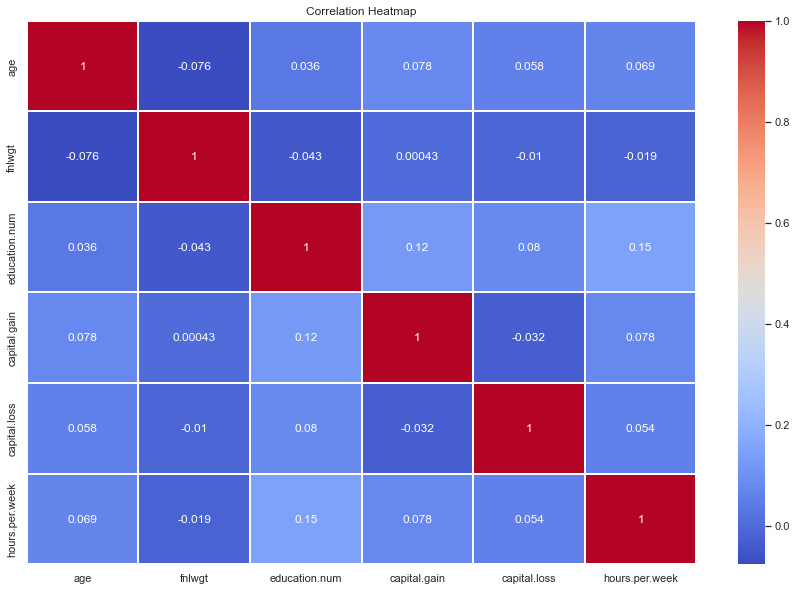

In [73]:
# Checking the relationship between the variables 
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.025)

plt.title('Correlation Heatmap')

plt.show()

## Bivariate analysis

## Relationship between income and age

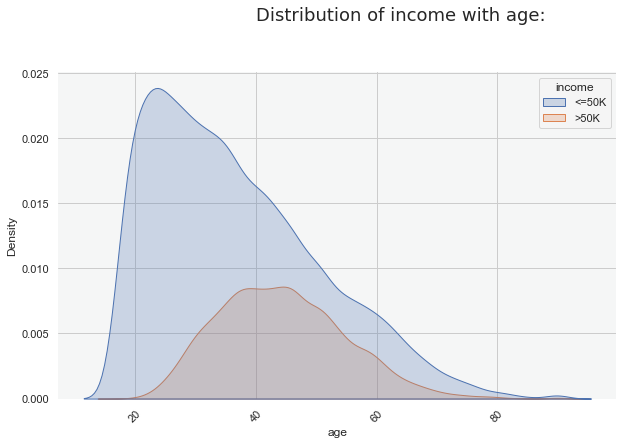

In [80]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=df["age"],hue=df["income"],fill=True)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with age:",**{'font':'Roboto Mono', 'size':18}, alpha = 1)
plt.xticks(rotation=45)
fig.show()

#### Observations

* Income increases as age increases and plummets down as you retire.
* People around the age 20 with <=50k are higher.

## Relationship between education and income

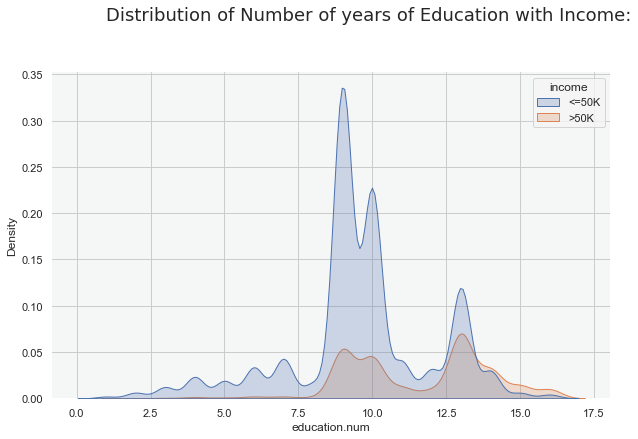

In [76]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=df["education.num"],hue=df["income"],fill=True,)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.2,1,"Distribution of Number of years of Education with Income:",**{'font':'Roboto Mono', 'size':18}, alpha = 1)

fig.show()

#### Observations

* Income increases with education.

## Let's plot all numerical variables to view their relationship with income

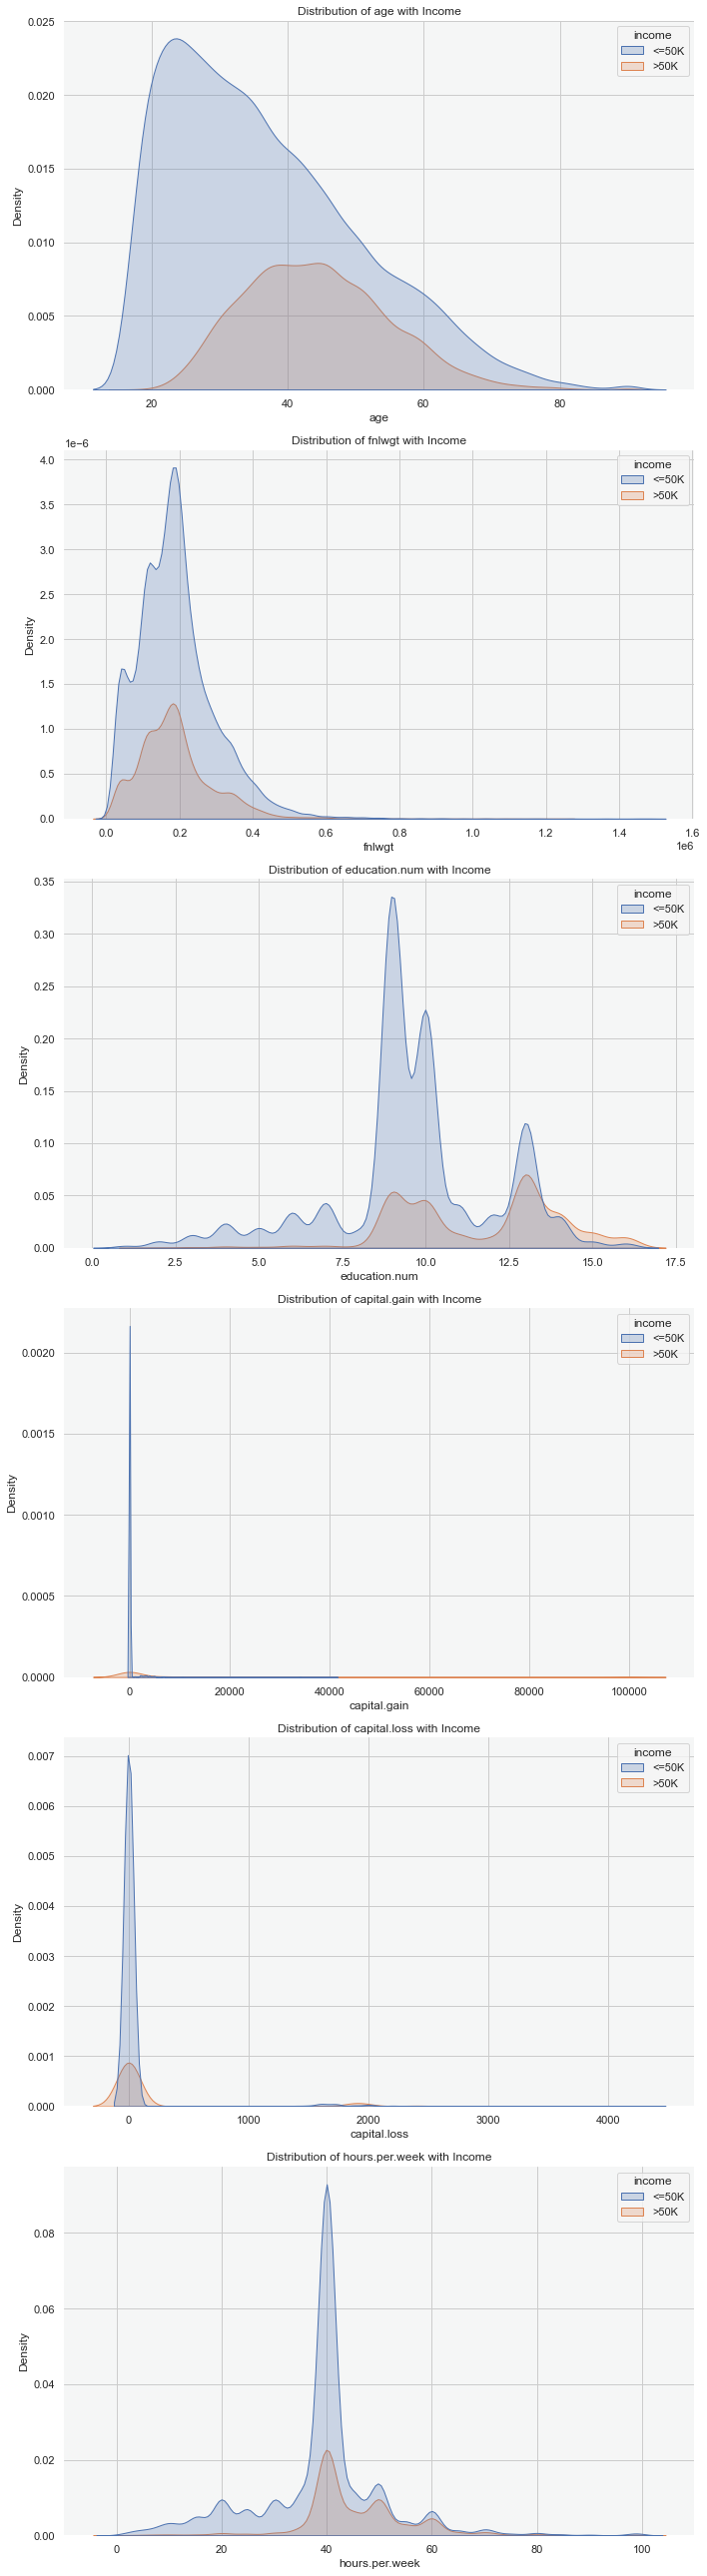

In [88]:
# Set the Seaborn theme with a grey background
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Get numerical columns
numerical_columns = df.select_dtypes(include="number").columns

# Set up subplots for numerical variables
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numerical_columns):
    ax = sns.kdeplot(x=df[col], hue=df["income"], fill=True, ax=axes[i])
    ax.set_facecolor('#f5f6f6')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
    
    ax.set_title(f'Distribution of {col} with Income')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Adjust layout for better readability
plt.tight_layout()

# Show the subplots
plt.show()

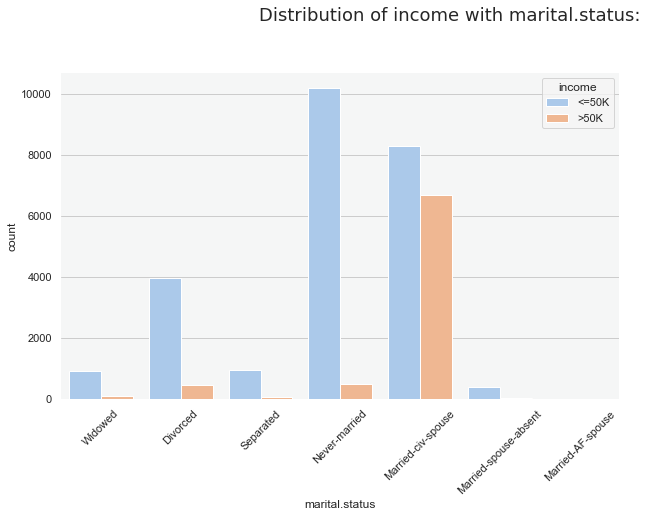

In [81]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='marital.status', hue='income', data=df, palette="pastel")
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with marital.status:",**{'font':'Roboto Mono', 'size':18}, alpha = 1)
plt.xticks(rotation=45)
fig.show()

### Observation

* Married people with Married-civ-spouse are more likely to have >50k income

### Lets visualize the relationships for all the categorical variables with income.

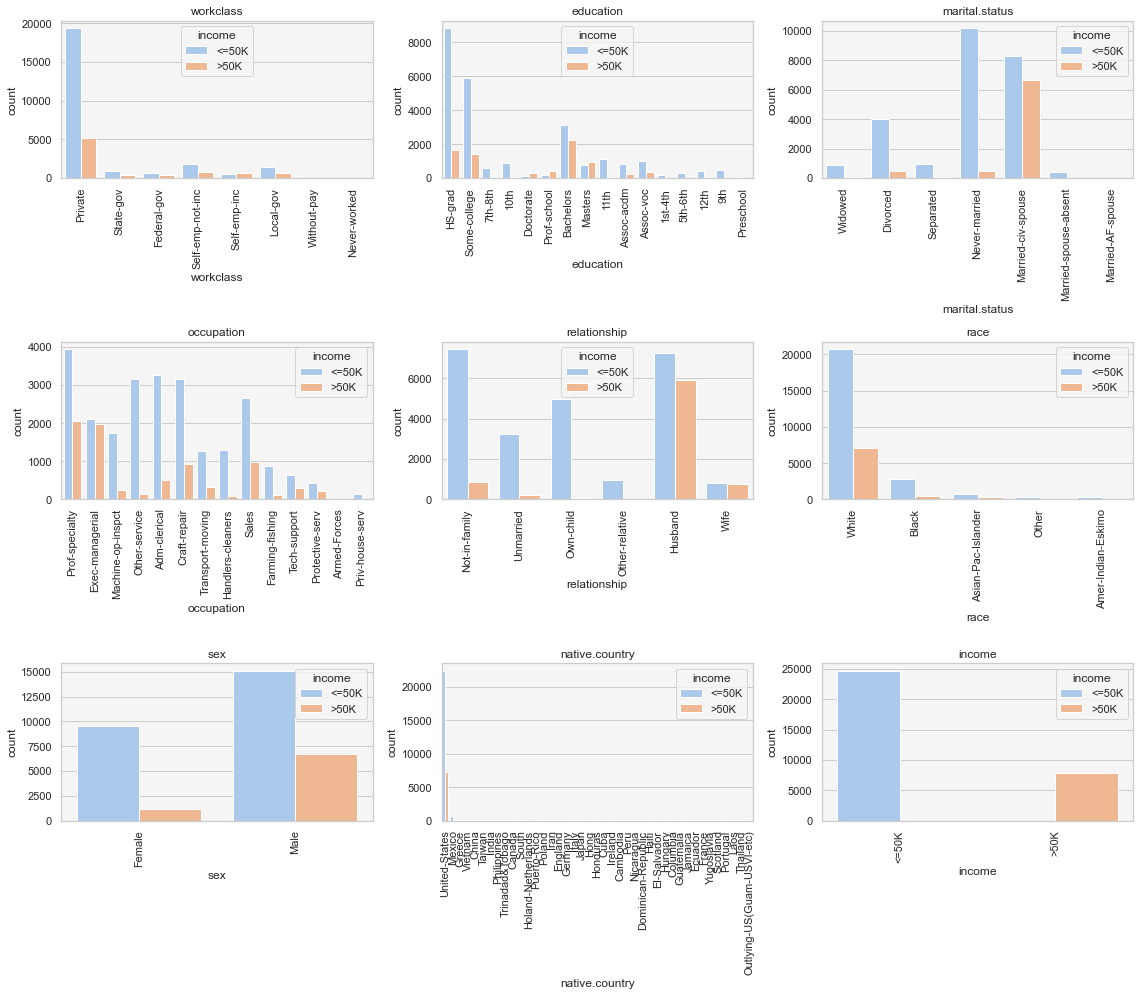

In [95]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

fields = df.select_dtypes(exclude="number").columns

figure_size = (16, 14)
cols = 3
rows = math.ceil(len(fields) / cols)

plt.subplots(rows, cols, figsize=figure_size)

for i, field in enumerate(fields, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=field,hue='income', data=df, palette="pastel")
    plt.title(field)
    plt.xticks(rotation=90)
    total_height = len(df[field])

    


plt.tight_layout()
plt.show()

### Observations

* Income increases with age, peaking around retirement.
* Higher education correlates with higher income.
* Occupation such as Prof-Speciality and Exec-Managerial have higher chance of over 50k income.
* Husbands have a higher chance of getting over 50k income than any other relationship.
* Males have higher ratio of over 50k salary in comparison to females.


### Outliers

### Using the box plot method lets find the number of outliers present and their respective visualization

In [101]:
kk=(df.select_dtypes(include='number').columns).to_list()

df2=df[kk]


upper =df2.quantile(0.75)+1.5 *(df2.quantile(0.75)-df2.quantile(0.25))
lower = df2.quantile(0.25)-1.5 *(df2.quantile(0.75)-df2.quantile(0.25))

for i in kk:
    print('Column: ',i)   
    x= df2[ (df2[i]<round(lower[i],2)) |  (df2[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt:',len(x))

Column:  age
No of Outliers presesnt: 142
Column:  fnlwgt
No of Outliers presesnt: 993
Column:  education.num
No of Outliers presesnt: 1193
Column:  capital.gain
No of Outliers presesnt: 2712
Column:  capital.loss
No of Outliers presesnt: 1519
Column:  hours.per.week
No of Outliers presesnt: 9002


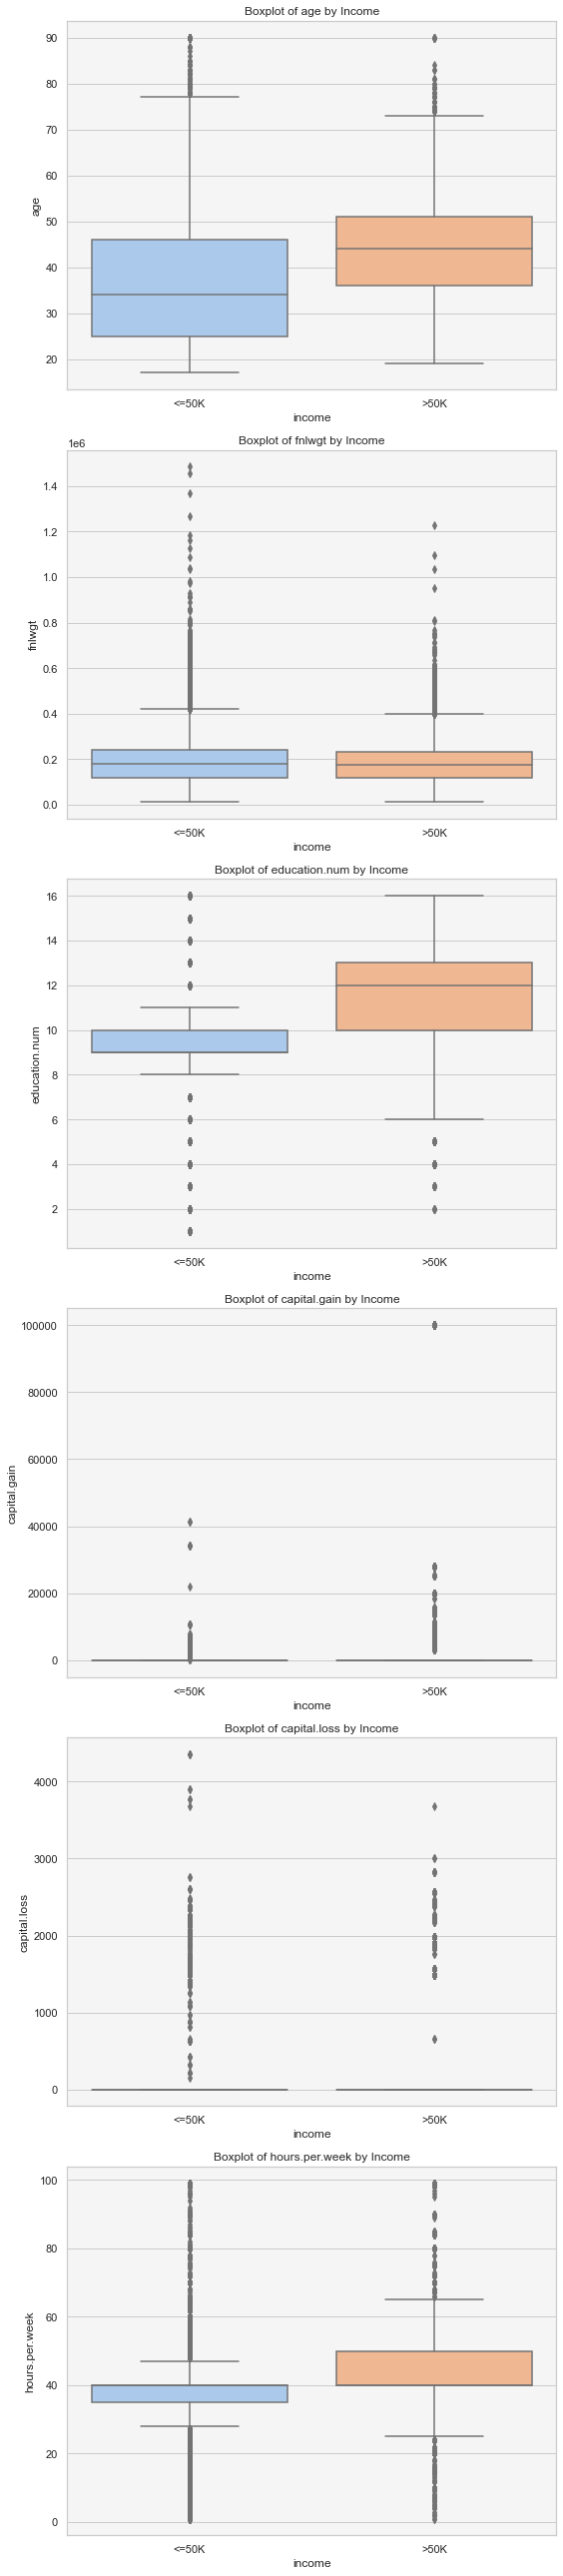

In [102]:
# Set the Seaborn theme with a grey background
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Get numerical columns
numerical_columns = df.select_dtypes(include="number").columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    ax = sns.boxplot(x='income', y=col, data=df, palette="pastel", ax=axes[i])
    ax.set_title(f'Boxplot of {col} by Income')

# Adjust layout for better readability
plt.tight_layout()

# Show the subplots
plt.show()

## Conclusion

#### In conclusion, the dataset is ideal for classification analysis, specifically predicting whether an individual's income exceeds a set threshold. The binary nature of the target variable aligns seamlessly with the objectives of classification models.